Naive Bayes algorithm such as gaussian naive bayes, bernoulli naive bayes, multinomial naive bayes etc using Purchase/shopping data set as example.


# Importing dataset and libraries

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Datasets/Sem6/archive/online_shoppers_intention.csv'

In [ ]:
import pandas as pd
import numpy as npd

In [ ]:
shopping = pd.read_csv(path)

In [ ]:
shopping = pd.DataFrame(shopping)

In [ ]:
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
import os

# EDA

In [ ]:
shopping.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [ ]:
shopping.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
shopping.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Feature learning

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


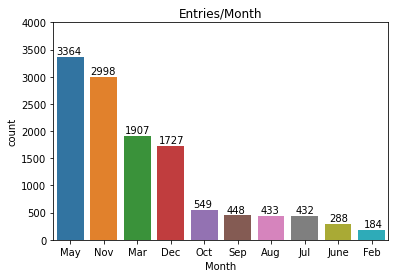

In [ ]:
monthly = shopping['Month'].value_counts()
sns.countplot(shopping['Month'], order=monthly.index)
plt.title('Entries/Month')
xval = -0.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

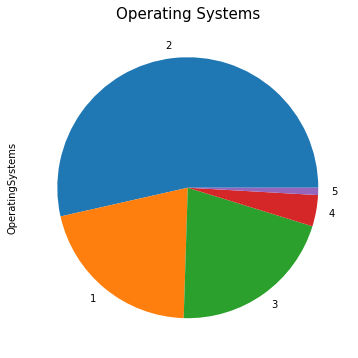

In [ ]:
shopping['OperatingSystems'] = shopping['OperatingSystems'].replace([5,6,7,8],5)
os_plot = shopping['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

In [ ]:
# removing redundant columns
shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [ ]:
shopping_clean.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'VisitorType',
       'Revenue'],
      dtype='object')

# Data Encoding

In [ ]:
# Vistor Type encoding
visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], 
                                 prefix='Visitor_Type', 
                                 drop_first = True)
shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], 
                                  axis=1).drop(['VisitorType'], axis=1)

In [ ]:
shopping_clean_merged.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Visitor_Type_Other,Visitor_Type_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,False,0,1


# Naive Bayes Classifier

### Gaussian Naive Bayes

In [ ]:
x = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=2, test_size=0.2)

In [ ]:
#Fitting data
# Gaussian naive bayes
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test) 

In [ ]:
# Prediction
print('Accuracy using Gaussian Naive Bayes: ',round(metrics.accuracy_score(y_test, y_pred)*100,2))

Accuracy using Gaussian Naive Bayes:  84.63


### Bernoulli Naive Bayes

In [ ]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

In [ ]:
model = BernoulliNB(binarize=0.0)
model.fit(x_train, y_train)

BernoulliNB()

In [ ]:
print("Accuracy using Bernoulli Naive Bayes: ", round(metrics.accuracy_score(y_test,y_pred)*100,2))

Accuracy using Bernoulli Naive Bayes:  84.63


### Multinomial Naive Bayes

In [ ]:
# Train and test the Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [ ]:
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)

In [ ]:
print("Accuracy using Bernoulli Naive Bayes: ", round(metrics.accuracy_score(y_test,y_pred)*100,2))

Accuracy using Bernoulli Naive Bayes:  86.82
